In [1]:
# Import necessary libraries 

import pandas as pd
import numpy as np

In [2]:
# Read the csv file and store in a dataframe

cluster_df = pd.read_csv("/Users/Janella Myzel B. Sy/Downloads/Student_performance_data _.csv")
cluster_df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7.0,1,2.0,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0.0,0,1.0,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26.0,0,2.0,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14.0,0,3.0,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17.0,1,3.0,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2.0,0,4.0,1,0,0,0,3.455509,0
2388,3389,17,0,0,1,7.583217,4.0,1,4.0,0,1,0,0,3.279150,4
2389,3390,16,1,0,2,6.805500,20.0,0,2.0,0,0,0,1,1.142333,2
2390,3391,16,1,1,0,12.416653,17.0,0,2.0,0,1,1,0,1.803297,1


# <font color='blue'> Part-1 </font>

### 1. Describe your dataset. What analysis will be performed?

<p>
    The dataset is called "Student_performance_data _.csv" has 2,392 rows and 15 columns, with the following structure and features:
    
    
    
    1. StudentID: Unique identifier for each student (integer).
    2. Age: Age of the student in years (integer, range: 15–18).
    3. Gender: Encoded as integers, where 0 likely represents one gender and 1 another (binary integer).
    4.Ethnicity: Encoded category for ethnicity (integer, range: 0–3).
    5. ParentalEducation: Encoded education level of parents (integer, range: 0–4).
    6. StudyTimeWeekly: Weekly study time in hours (float, range: ~0–19.98).
    7. Absences: Number of absences recorded (float, some missing values, range: 0–29).
    8. Tutoring: Indicates whether the student is receiving tutoring (binary integer, 0 or 1).
    9. ParentalSupport: A scale representing the level of parental support (float, range: 0–4).
    10. Extracurricular: Participation in extracurricular activities (binary integer, 0 or 1).
    11. Sports: Participation in sports (binary integer, 0 or 1).
    12. Music: Participation in music activities (binary integer, 0 or 1).
    13. Volunteering: Values recorded as object type but likely representing a category or binary data.
    14. GPA: Student's Grade Point Average on a scale (float, range: ~0–4.0).
    15. GradeClass: Encoded grade classification (integer, range: 0–4).

    
With this, we will use Clustering Algorithm for the analysis with our dataset.
</p>

In [3]:
# Display the dataframe information

cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2385 non-null   float64
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2387 non-null   float64
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   object 
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 280.4+ KB


In [4]:
# Display the statistical summary of the data

cluster_df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2385.000000,2392.000000,2387.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.580713,0.470736,2.123586,0.383361,0.303512,0.196906,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.448589,4.104753,1.120663,0.486307,0.459870,0.397744,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,100.000000,4.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### 2. Display the training and testing score using noisy data. 

<p>
    In this section, initial data preprocessing is performed - with as little manipulation as possible - just to ensure the data fits into the model. <br><br>
    This section includes the following: <br>
    - removing null values by replacing them with -1 <br>
    - validating data types and replacing invalid values with -1 <br>
    - splitting the data into training and testing sets (default parameters) <br>
    - training a model (default parameters) <br>
    - using the silhouette score as an evaluation metric
</p>

In [5]:
# Check for null values for each column

cluster_df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             7
Tutoring             0
ParentalSupport      5
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
# Impute null values in Absences and ParentalSupport columns with -1

cluster_df['Absences'] = cluster_df['Absences'].fillna(-1).astype('int64')
cluster_df['ParentalSupport'] = cluster_df['ParentalSupport'].fillna(-1).astype('int64')

In [7]:
# Recheck null values for each column

cluster_df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [8]:
# For continuous data: 
# Create functions to validate the datatype of the values in a column

# integer validation
def validateIntegerValues (df, column_name):
    """
    Function that returns indices with invalidate integer values in a column
    """
    invalid_indices = []
    for idx, value in enumerate(df[column_name]):
        try:
            int_value = int(value)
        except (ValueError, TypeError):
            noise_loc = idx
            invalid_indices.append(noise_loc+2)

    if len(invalid_indices):
        return invalid_indices
    else:
        return None 

# float validation
def validateFloatValues (df, column_name):
    """
    Function that returns indices with invalidate float values in a column
    """
    invalid_indices = []
    for idx, value in enumerate(df[column_name]):
        try:
            float_value = float(value)
        except (ValueError, TypeError):
            noise_loc = idx
            invalid_indices.append(noise_loc+2)
    return invalid_indices

In [9]:
# Validate each column

columns_int = ['Age', 'Absences']
columns_float = ['StudyTimeWeekly', 'GPA']

def checkIntValues (df, column_names):
    """
    Function to perform int validation for each column
    """
    for i in column_names:
        column_invalid = validateIntegerValues(df, i)
        if column_invalid:
            print(i, " Indices with invalid values: ", column_invalid)
        else:
            print("All", i, "values are valid integers.")

def checkFloatValues (df, column_names):
    """
    Function to perform float validation for each column
    """
    for i in column_names:
        column_invalid = validateFloatValues(df, i)
        if column_invalid:
            print(i, " Indices with invalid values: ", column_invalid)
        else:
            print("All", i, "values are valid float.")


checkIntValues(cluster_df, columns_int)
checkFloatValues(cluster_df, columns_float)

All Age values are valid integers.
All Absences values are valid integers.
All StudyTimeWeekly values are valid float.
All GPA values are valid float.


In [10]:
# For categorical data
# Create a function to check categorical values in a column

columns_categorical = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

def checkCategoricalValues (column_names):
    """
    Function to print unique values (categories) from a column
    """
    for i in column_names:
        print(i, "values:", cluster_df[i].unique())

checkCategoricalValues(columns_categorical)

Gender values: [1 0]
Ethnicity values: [0 2 1 3]
ParentalEducation values: [2 1 3 4 0]
Tutoring values: [  1   0  10 100]
ParentalSupport values: [ 2  1  3  4  0 -1]
Extracurricular values: [0 1]
Sports values: [0 1]
Music values: [1 0]
Volunteering values: ['0' '1' 'No' 'Yes' 'Y' 'N']
GradeClass values: [2 1 4 3 0]


In [11]:
# Replace outliers / invalid values in Tutoring and Volunteering columns with -1

cluster_df['Tutoring'] = cluster_df['Tutoring'].replace({10: -1, 100: -1})
print("Tutoring values:", cluster_df['Tutoring'].unique())

cluster_df['Volunteering'] = cluster_df['Volunteering'].replace({'No': 0, 'N': 0, '0': 0, 'Yes': 1, 'Y': 1, '1': 1})
print("Volunteering values:", cluster_df['Volunteering'].unique())

Tutoring values: [ 1  0 -1]
Volunteering values: [0 1]


In [12]:
# Split the data

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(cluster_df)

In [13]:
# Create and train a model

from sklearn.cluster import KMeans

kmeans = KMeans(n_init='auto')
kmeans.fit(X_train)

KMeans(n_init='auto')

In [14]:
# Get the silhouette scores of the train and test sets

from sklearn.metrics import silhouette_score

train_score = silhouette_score(X_train, kmeans.labels_, metric='euclidean')
print("Train Silhoutte Score:", train_score)

kmeans_test = kmeans.predict(X_test)

test_score = silhouette_score(X_test, kmeans_test, metric='euclidean')
print("Test Silhoutte Score:", test_score)

Train Silhoutte Score: 0.5339031036184788
Test Silhoutte Score: 0.5356581137324629


### 3. Create a function that will check for duplicate rows/records. 

In [15]:
# Check for duplicate records

def check_duplicates(df):
    """
    Function to return duplicate records
    """
    duplicates = df[df.duplicated()]
    if len(duplicates) == 0:
        return "No duplicate records"
    else:
        return duplicates

print(check_duplicates(cluster_df))

No duplicate records


### 4. Perform data preprocessing first before removing any column from the dataset for feature selection

<p>
This section includes the following: <br>
- checking and identifying noisy data <br>
- identifying the location of noisy data <br>
- mean and mode imputations <br>
- dropping the 'StudentID' column, which will not be used in this project 
</p>

In [16]:
# Create functions to check noisy data

def checkNoiseWithZero (df, column_name):
    """
    Function that gets indices with negative values (outliers) in a column
    """
    outlier_indices = []
    for idx, value in enumerate(df[column_name]):
        if value >= 0: #not including zero
            continue
        else:
            noise_loc = idx
            outlier_indices.append(noise_loc+2)
    return outlier_indices

def checkNoiseRatio (df, column_name):
    """
    Function that gets indices with zero and negative values (outliers) in a column
    """
    outlier_indices = []
    for idx, value in enumerate(df[column_name]):
        if value > 0: #including zero
            continue
        else:
            noise_loc = idx
            outlier_indices.append(noise_loc+2)
    return outlier_indices

In [17]:
# Check for noise in each column 

columns_withZero = ['Gender', 'Ethnicity', 'ParentalEducation', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
columns_Ratio = ['Age', 'StudyTimeWeekly', 'GPA'] 

def checkColumnsNoiseWithZero (df, column_names):
    """
    Function to implement the checkNoiseWithZero(df, column_name) function to each column 
    """
    for i in column_names:
        if len(checkNoiseWithZero(df, i)) > 0:
            print("Indices of Outliers in", i, "column: ", checkNoiseWithZero(df, i))
        else:
            print("No outliers found in", i, "column.")

def checkColumnsNoiseRatio (df, column_names):
    """
    Function to implement the checkNoiseRatio(df, column_name) function to each column 
    """
    for i in column_names:
        if len(checkNoiseRatio(df, i)) > 0:
            print("Indices of Outliers in", i, "column: ", checkNoiseRatio(df, i))
        else:
            print("No outliers found in", i, "column.")

checkColumnsNoiseWithZero(cluster_df, columns_withZero)
checkColumnsNoiseRatio(cluster_df, columns_Ratio)

No outliers found in Gender column.
No outliers found in Ethnicity column.
No outliers found in ParentalEducation column.
Indices of Outliers in Absences column:  [10, 22, 46, 71, 214, 393, 551]
Indices of Outliers in Tutoring column:  [40, 153, 280, 450, 500]
Indices of Outliers in ParentalSupport column:  [352, 505, 807, 900, 1000]
No outliers found in Extracurricular column.
No outliers found in Sports column.
No outliers found in Music column.
No outliers found in Volunteering column.
No outliers found in GradeClass column.
No outliers found in Age column.
No outliers found in StudyTimeWeekly column.
Indices of Outliers in GPA column:  [89, 476, 486, 631, 881, 965, 1288, 1502, 1514, 1624, 1726, 1834, 2126, 2206, 2221, 2312]


### What are the different types of noise you have identified in the dataset?

<p>  
The dataset exhibits several types of noise that could impact analysis and modeling. Missing values are present in some columns such as ParentalSupport and Absences, leading to incomplete data points that require imputation or removal. Outliers, particularly in features like Volunteering or GPA, deviate significantly from typical values and could distort clustering or statistical analysis. Additionally, the dataset contains features with inconsistent scales, such as random strings for Volunteering and integers for GPA, necessitating normalization to ensure balanced contributions during modeling. Duplicated entries, if present, introduce redundancy, while irrelevant or redundant features could reduce model efficiency and interpretability. Measurement or entry errors, such as implausible values, further complicate the dataset’s quality. Lastly, class imbalance in categorical features like GradeClass may bias results toward overrepresented categories. 
</p>

In [18]:
# Mode imputation for categorical data

from sklearn.impute import SimpleImputer

# Display modes of Tutoring and ParentalSupport columns
print("Modes") 

mode_tutoring = cluster_df['Tutoring'].mode().iloc[0]
print("Tutoring:", mode_tutoring)

mode_parentalsupport = cluster_df['ParentalSupport'].mode().iloc[0]
print("ParentalSupport:", mode_parentalsupport)

Modes
Tutoring: 0
ParentalSupport: 2


In [19]:
# Create mode imputation function

def modeImputation(df, column_name):
    imputer_tutor = SimpleImputer(strategy='most_frequent', missing_values=-1) #replace the -1 values

    imputer_tutor.fit(df[[column_name]])
    df[[column_name]] = imputer_tutor.transform(df[[column_name]])
    print(column_name, " values: ", df[column_name].unique())

In [20]:
# Perform mode imputation for Tutoring and ParentalSupport columns

modeImputation(cluster_df, 'Tutoring')
modeImputation(cluster_df, 'ParentalSupport')

Tutoring  values:  [1 0]
ParentalSupport  values:  [2 1 3 4 0]


In [21]:
# Mean imputation for continuous data

# Create mean imputation function
def meanImputation(df, column_name, outliers, mean):
    df.loc[outliers, column_name] = mean

In [22]:
# Mean imputation for Absences column

absences_outliers = checkNoiseWithZero(cluster_df, 'Absences') 
absences_outliers = [x - 2 for x in absences_outliers] #indexes of outliers

absences_mean = round(cluster_df['Absences'].mean()) #mean

meanImputation(cluster_df, 'Absences', absences_outliers, absences_mean)

In [23]:
# Mean imputation for GPA column

gpa_outliers = checkNoiseRatio(cluster_df, 'GPA') 
gpa_outliers = [x - 2 for x in gpa_outliers] #indexes of outliers

gpa_mean = cluster_df['GPA'].mean() #mean

meanImputation(cluster_df, 'GPA', gpa_outliers, gpa_mean)

In [24]:
# Recheck for outliers and null values in every column

checkColumnsNoiseWithZero(cluster_df, columns_withZero)
checkColumnsNoiseRatio(cluster_df, columns_Ratio)

No outliers found in Gender column.
No outliers found in Ethnicity column.
No outliers found in ParentalEducation column.
No outliers found in Absences column.
No outliers found in Tutoring column.
No outliers found in ParentalSupport column.
No outliers found in Extracurricular column.
No outliers found in Sports column.
No outliers found in Music column.
No outliers found in Volunteering column.
No outliers found in GradeClass column.
No outliers found in Age column.
No outliers found in StudyTimeWeekly column.
No outliers found in GPA column.


In [25]:
# Drop the StudentID column for this will not be used in the entire project

cluster_df = cluster_df.drop(['StudentID'], axis=1)

cluster_df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


### 5. Perform feature discretization on categorical values. 

<p>
    The retrieved dataset was already discretized. According to the data source, the following are the codes of the categorical columns respectively. <br>

Gender: Gender of the students, where 0 represents Male and 1 represents Female. <br>

Ethnicity: The ethnicity of the students, coded as follows: <br>
0: Caucasian <br>
1: African American <br>
2: Asian <br>
3: Other <br>

ParentalEducation: The education level of the parents, coded as follows: <br>
0: None <br>
1: High School <br>
2: Some College <br>
3: Bachelor's <br>
4: Higher <br>

Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes. <br>

ParentalSupport: The level of parental support, coded as follows: <br>
0: None <br>
1: Low <br>
2: Moderate <br>
3: High <br>
4: Very High <br>

Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes. <br>

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes. <br>

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes. <br>

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes. <br>

GradeClass: Classification of students' grades based on GPA: <br>
0: 'A' (GPA >= 3.5) <br>
1: 'B' (3.0 <= GPA < 3.5) <br>
2: 'C' (2.5 <= GPA < 3.0) <br>
3: 'D' (2.0 <= GPA < 2.5) <br>
4: 'F' (GPA < 2.0) <br>
</p>

### 6. Perform feature scaling.

In [26]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Scale columns function
def scaleColumn(df, column_names):
    for i in column_names:
        to_scale = df[[i]]
        scaled = StandardScaler().fit_transform(to_scale)
        df[i] = scaled

In [27]:
# Scale the Age and Absences columns (columns_int) and the StudyTimeWeekly and GPA columns (columns_float) 

scaleColumn(cluster_df, columns_int)
scaleColumn(cluster_df, columns_float)

cluster_df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0.472919,1,0,2,1.780336,-0.898922,1,2,0,0,1,0,1.120649,2
1,1.362944,0,0,1,0.997376,-1.728849,0,1,0,0,0,0,1.246794,1
2,-1.307132,0,2,3,-0.984045,1.353736,0,2,0,0,0,0,-2.003710,4
3,0.472919,1,0,3,0.045445,-0.068995,0,3,1,0,0,0,0.150063,3
4,0.472919,1,0,2,-0.902311,0.286688,1,3,0,0,0,0,-0.699811,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,1.362944,1,0,3,0.160762,-1.491727,0,4,1,0,0,0,1.704472,0
2388,0.472919,0,0,1,-0.387285,-1.254605,1,4,0,1,0,0,1.508842,4
2389,-0.417106,1,0,2,-0.524895,0.642370,0,2,0,0,0,1,-0.861462,2
2390,-0.417106,1,1,0,0.467950,0.286688,0,2,0,1,1,0,-0.128276,1


# <font color='blue'> Part-2 </font>

In [28]:
# Split the data for training (70%) and testing (30%)
X_train, X_test = train_test_split(cluster_df, train_size = 0.7)

In [29]:
X_train

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
1733,1.362944,0,1,2,1.761678,-1.017483,1,1,0,1,1,0,1.554507,1
188,0.472919,1,0,2,-0.029955,0.998053,0,0,1,1,0,0,-0.777668,4
2104,1.362944,0,0,1,-0.249947,1.116614,0,3,0,0,0,0,-1.359103,4
2173,-0.417106,1,2,2,1.301175,-0.187556,0,1,0,0,1,0,-0.133097,4
700,-0.417106,0,0,2,0.584537,-1.017483,0,3,0,0,0,0,0.855483,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,-1.307132,0,0,1,-0.561345,0.523809,0,2,0,0,0,0,-1.077991,4
489,-1.307132,0,2,2,-0.747304,1.590858,0,2,1,0,0,0,-1.890879,4
498,-1.307132,1,0,1,0.102733,0.049566,0,2,1,0,1,0,0.300845,3
1403,-0.417106,1,1,1,-1.511279,-0.424678,0,2,1,0,1,0,0.306207,3


In [30]:
X_test

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
475,1.362944,1,2,3,-1.207258,-1.491727,1,3,0,1,0,1,1.358824,1
1064,-0.417106,0,1,1,0.784111,-0.780361,1,0,1,0,1,0,0.558288,3
371,1.362944,0,0,1,-0.835211,0.879492,0,2,0,0,1,0,-1.750323,4
133,-1.307132,1,0,1,-1.618609,-1.491727,0,1,1,0,0,0,0.563076,3
438,0.472919,1,0,1,-0.861068,1.116614,0,2,0,1,0,0,-1.096965,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.472919,1,2,2,0.922628,0.998053,0,1,0,0,0,0,-1.008887,4
123,0.472919,1,3,1,0.533608,-1.254605,0,3,0,0,0,0,1.311973,1
1616,0.472919,1,1,2,-1.231321,-1.491727,1,1,0,0,0,0,1.236119,1
777,1.362944,1,0,4,-1.526886,0.642370,1,1,1,0,0,0,-1.215940,4


### 1. Perform 10-fold cross validation using KFold. 

In [31]:
# 10-Fold Cross Validation 

from sklearn.model_selection import KFold

# Define model
kmeans_model = KMeans(n_clusters=4)

# K-fold cross validator 
kf = KFold(n_splits=10, shuffle=True, random_state=33)

In [32]:
# Create a scorer variable for the silhouette score

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

### 2. Perform grid search method for hyperparameter tuning.

The result of the KFold must be used as the value of the cv parameter of the grid search.

In [33]:
# Grid Search

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5],  # Number of clusters to try
    'n_init': [5, 10, 15],
    'max_iter': [50, 100, 150]
}

# Initialize GridSearchCV
kmeans_grid_search = GridSearchCV(estimator=kmeans_model, param_grid=param_grid, cv=kf, n_jobs=-1, scoring=silhouette_scorer)

# Fit the model
kmeans_grid_search.fit(X_train)

# Display best parameters and best score
print("Best Parameters:", kmeans_grid_search.best_params_)
print("Best Cross-Validation Score:", kmeans_grid_search.best_score_)

Best Parameters: {'max_iter': 50, 'n_clusters': 2, 'n_init': 5}
Best Cross-Validation Score: 0.21398828981505263


C:\Users\Janella Myzel B. Sy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


### 3. Display a graph or tabulated result of the selected hyperparameter(s).

In [34]:
# Store the GridSearchCV results in a dataframe
cv_df = pd.DataFrame(kmeans_grid_search.cv_results_)

cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.196148,0.025462,0.127522,0.012869,50,2,5,"{'max_iter': 50, 'n_clusters': 2, 'n_init': 5}",0.222076,0.214393,...,0.201214,0.216876,0.202962,0.205160,0.230806,0.228963,0.206804,0.213988,0.010033,1
1,0.236913,0.010888,0.230378,0.012790,50,2,10,"{'max_iter': 50, 'n_clusters': 2, 'n_init': 10}",0.222076,0.214393,...,0.200648,0.215342,0.202462,0.205160,0.230122,0.228963,0.206480,0.213671,0.010023,3
2,0.374714,0.009802,0.387768,0.054437,50,2,15,"{'max_iter': 50, 'n_clusters': 2, 'n_init': 15}",0.222076,0.214393,...,0.200648,0.215342,0.202462,0.205160,0.230122,0.228963,0.206480,0.213671,0.010023,3
3,0.124887,0.009440,0.137391,0.023054,50,3,5,"{'max_iter': 50, 'n_clusters': 3, 'n_init': 5}",0.159536,0.136714,...,0.142657,0.146391,0.133935,0.138568,0.144400,0.140691,0.136053,0.143184,0.007612,13
4,0.324304,0.055011,0.241707,0.007640,50,3,10,"{'max_iter': 50, 'n_clusters': 3, 'n_init': 10}",0.139529,0.140215,...,0.136955,0.146399,0.141618,0.140662,0.144459,0.137695,0.136053,0.140962,0.003486,18
5,0.390704,0.011856,0.365279,0.008700,50,3,15,"{'max_iter': 50, 'n_clusters': 3, 'n_init': 15}",0.158045,0.147489,...,0.135821,0.148668,0.143824,0.138982,0.144433,0.143010,0.136053,0.144236,0.006255,10
6,0.136865,0.007149,0.131701,0.007650,50,4,5,"{'max_iter': 50, 'n_clusters': 4, 'n_init': 5}",0.140436,0.123245,...,0.132445,0.148118,0.134612,0.123212,0.130016,0.124027,0.122522,0.132104,0.008702,21
7,0.297766,0.022958,0.262447,0.014970,50,4,10,"{'max_iter': 50, 'n_clusters': 4, 'n_init': 10}",0.137435,0.121663,...,0.126040,0.124335,0.138028,0.115403,0.129184,0.131443,0.134512,0.130391,0.008504,25
8,0.438604,0.008429,0.387791,0.013957,50,4,15,"{'max_iter': 50, 'n_clusters': 4, 'n_init': 15}",0.135142,0.119137,...,0.116133,0.146363,0.136870,0.134700,0.130985,0.133203,0.120899,0.131933,0.009916,22
9,0.160259,0.008561,0.136405,0.008469,50,5,5,"{'max_iter': 50, 'n_clusters': 5, 'n_init': 5}",0.137514,0.120859,...,0.111622,0.132785,0.120211,0.106288,0.117000,0.122712,0.116785,0.119866,0.008979,36


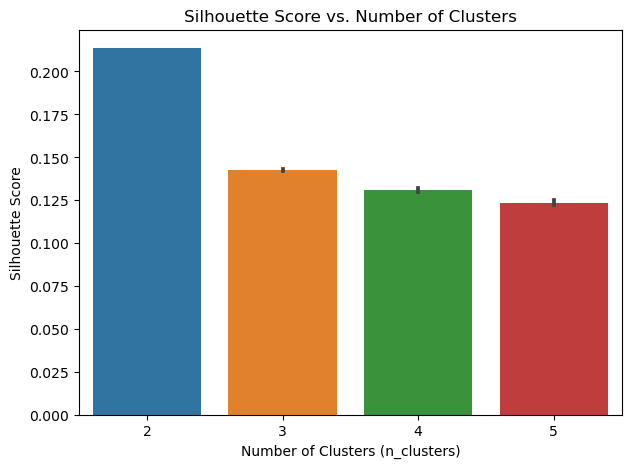

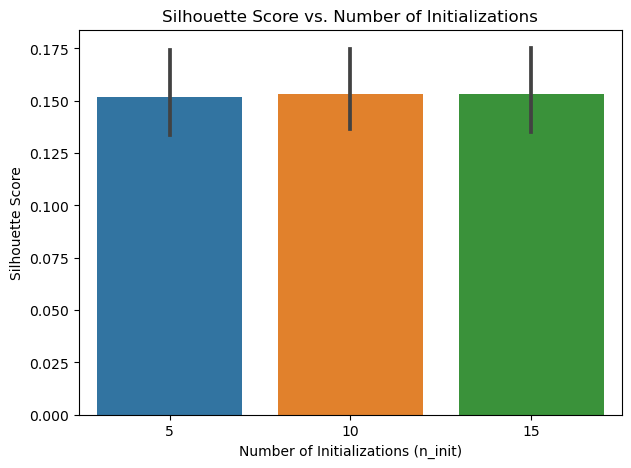

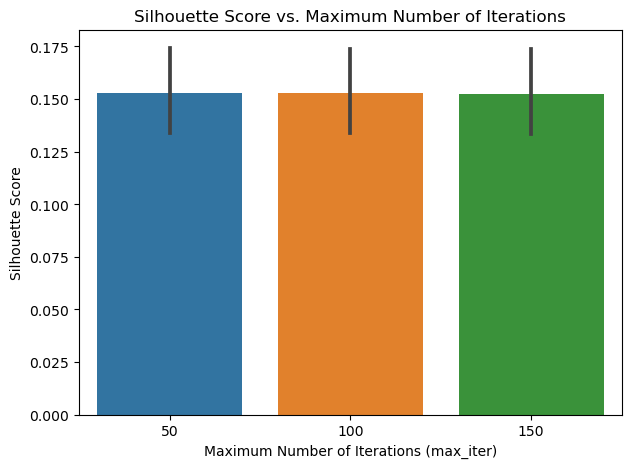

In [35]:
# Display the results through bar graphs

import matplotlib.pyplot as plt
import seaborn as sns

# n_clusters parameter
plt.figure(figsize=(7, 5))
sns.barplot(x='param_n_clusters', y='mean_test_score', data=cv_df)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.show()

# n_init parameter
plt.figure(figsize=(7, 5))
sns.barplot(x='param_n_init', y='mean_test_score', data=cv_df)
plt.title('Silhouette Score vs. Number of Initializations')
plt.xlabel('Number of Initializations (n_init)')
plt.ylabel('Silhouette Score')
plt.show()

# max_iter parameter
plt.figure(figsize=(7, 5))
sns.barplot(x='param_max_iter', y='mean_test_score', data=cv_df)
plt.title('Silhouette Score vs. Maximum Number of Iterations')
plt.xlabel('Maximum Number of Iterations (max_iter)')
plt.ylabel('Silhouette Score')
plt.show()

### 4. Display a feature importance graph or tabulation.

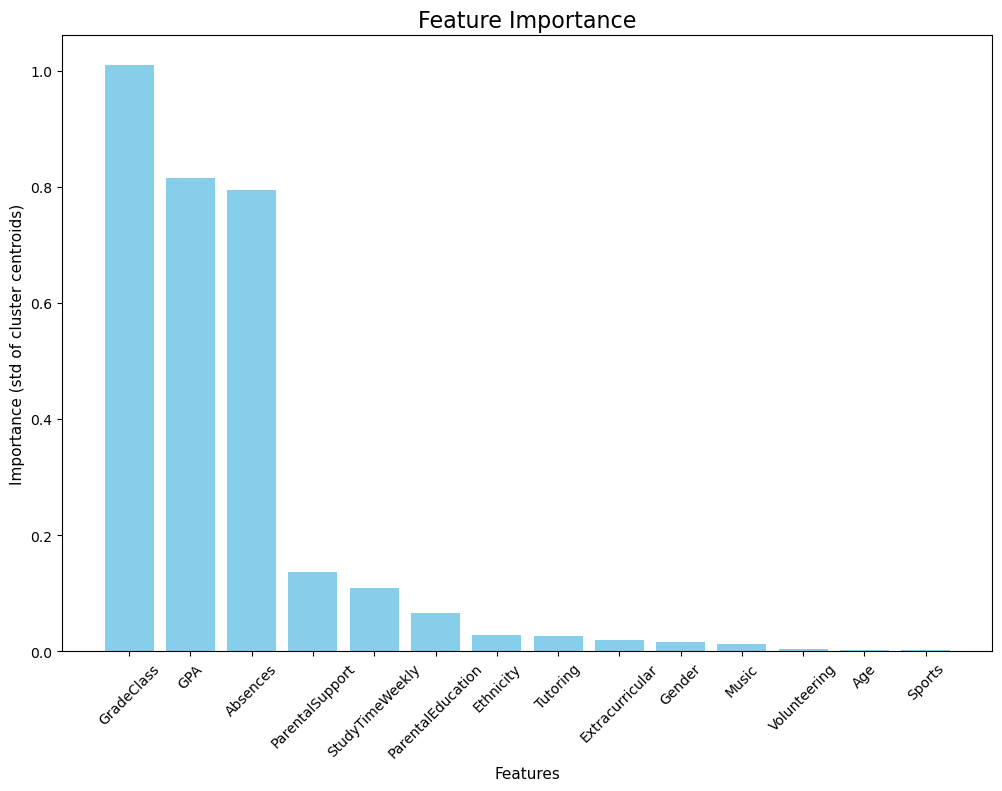

In [36]:
# Set the parameters based from the results of the hyperparameter tuning 
kmeans_params = {"n_clusters": 2,"n_init": 15,"max_iter": 50}

# Create the model and fit the data
kmeans = KMeans(**kmeans_params)
kmeans.fit(cluster_df)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Calculate the importance based on the variance of each feature
feature_importance = np.std(centroids, axis=0)

# Create a dataframe to store the features with their corresponding importance scores
importance_df = pd.DataFrame({
    'Feature': cluster_df.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features', fontsize=11)
plt.ylabel('Importance (std of cluster centroids)', fontsize=11)
plt.title('Feature Importance', fontsize=16)
plt.xticks(rotation=45)
plt.show()

### 5. Perform a feature selection based on the feature importance result. 

<p>
    The result of the feature importance shows that the features 'GradeClass', 'GPA', and 'Absences' significantly have the highest importance scores. Thus, these features will be selected in implementing the model.
</p>

In [37]:
# Feature Selection: GradeClass, GPA, Absences

# Feature Selection for X_train set
X_train = X_train[['GradeClass','GPA','Absences']]

# Feature Selection for X_test set
X_test = X_test[['GradeClass','GPA','Absences']]

# <font color='blue'> Part-3 </font>

### 1. Implement the Clustering Algorithm - KMeans 

In [38]:
# Create the model with the selected parameters and fit the train set

kmeans = KMeans(**kmeans_params)
kmeans.fit(X_train)

C:\Users\Janella Myzel B. Sy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(max_iter=50, n_clusters=2, n_init=15)

In [39]:
# Get the silhouette scores of the train and test sets

final_train_score = silhouette_score(X_train, kmeans.labels_, metric='euclidean')
print("Train Silhoutte Score:", final_train_score)

kmeans_final_test = kmeans.predict(X_test)

final_test_score = silhouette_score(X_test, kmeans_final_test, metric='euclidean')
print("Test Silhoutte Score:", final_test_score)

Train Silhoutte Score: 0.5578435487626
Test Silhoutte Score: 0.5572442167878213


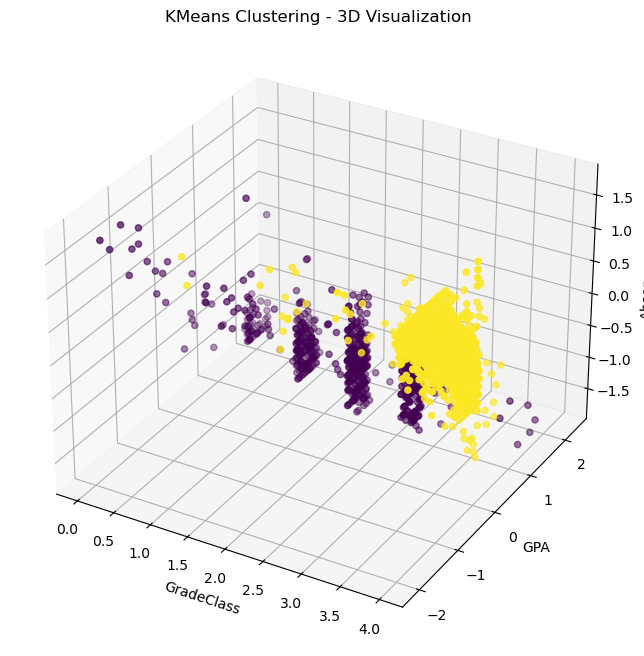

In [40]:


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['GradeClass'], X_train['GPA'], X_train['Absences'], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('GradeClass')
ax.set_ylabel('GPA')
ax.set_zlabel('Absences')
plt.title('KMeans Clustering - 3D Visualization')
plt.show()

# Part-4

<p>
    The analysis of the clustering results reveals improvements in performance after implementing exploratory data analysis (EDA), hyperparameter tuning, and feature selection. Initially, the train silhouette score was 0.5339, and the test silhouette score was 0.5357. These scores, while above zero, indicated moderate clustering quality, where some overlap between clusters might have been present. After refining the approach, the train silhouette score increased to 0.5578, and the test silhouette score improved to 0.5572. These improvements suggest better-defined clusters with reduced overlap and more consistent grouping of data points.

Key steps contributing to this enhancement included careful selection of hyperparameters. The chosen configuration, with n_clusters set to 2, n_init to 15, and max_iter to 50, ensured that the algorithm thoroughly explored initial cluster placements and converged effectively. Additionally, focusing on features such as GradeClass, GPA, and Absences likely helped the model capture the most relevant dimensions of the data, reducing noise and enhancing interpretability.

According to established guidelines, silhouette scores close to 1 indicate dense, well-separated clusters, while scores near 0 suggest overlapping groups. Although the final silhouette scores do not approach 1, the improvement demonstrates progress toward clearer cluster separation. The refinement process highlights the importance of EDA, thoughtful feature selection, and iterative hyperparameter tuning in optimizing clustering performance. The results suggest that the dataset's structure lends itself to meaningful grouping, though further adjustments or additional features might still be explored to enhance clustering quality further. This iterative improvement process underscores the value of thorough preprocessing and parameter adjustment in achieving reliable and actionable clustering insights. <br><br>

</p>